## Reading and spliting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
df = pd.read_csv("./data/train.csv", index_col =0, parse_dates=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

y = df["count"]
X = df.drop(["count","casual", "registered"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

<Figure size 864x576 with 0 Axes>

# EDA (exploratory data analysis)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df['year'] = df.index.year
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012


In [7]:
df['month'] = df.index.month
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12


In [8]:
df['dayofweek'] = df.index.dayofweek
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2


In [9]:
df['hour'] = df.index.hour
df.head(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3


### Feature selection (corrolation --> first way)

<AxesSubplot:>

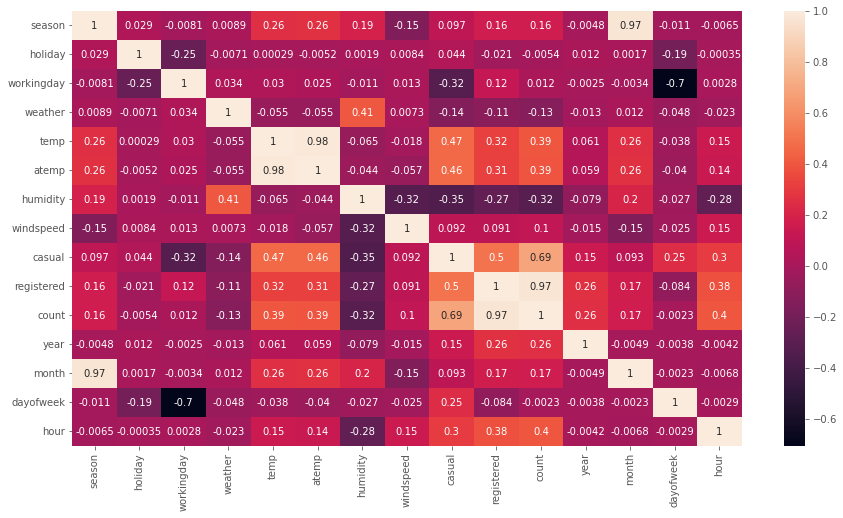

In [10]:
plt.figure(figsize=(15,8)) 
sns.heatmap(df.corr(), annot = True)

High corrolaction for:
* atemp and temp
* season and month

### Feature selection ( Variance Inflation Factor --> second way)

In [11]:
x_train['dayofweek'] = x_train.index.dayofweek
x_train['month'] = x_train.index.month
x_train['year'] = x_train.index.year
x_train['hour'] = x_train.index.hour

In [12]:
standard = StandardScaler()
standard.fit(x_train)                
x_train_scaled = standard.transform(x_train)

X_vif = add_constant(x_train_scaled)
X_vif

array([[ 1.        , -1.35482048, -0.17140125, ..., -1.02317333,
        -1.00147095, -0.80147716],
       [ 1.        , -0.4549869 , -0.17140125, ..., -0.73226342,
        -1.00147095,  0.50288485],
       [ 1.        , -0.4549869 , -0.17140125, ..., -0.73226342,
        -1.00147095,  1.51738863],
       ...,
       [ 1.        , -0.4549869 , -0.17140125, ..., -0.15044361,
         0.99853121, -0.51161894],
       [ 1.        , -0.4549869 , -0.17140125, ..., -0.73226342,
         0.99853121, -0.51161894],
       [ 1.        , -1.35482048, -0.17140125, ..., -1.60499315,
         0.99853121, -1.09133539]])

In [13]:
X_vif = pd.DataFrame(X_vif)
n_columns = X_vif.shape[1]
vifs = []

for i in range(n_columns):
    vif = variance_inflation_factor(X_vif.values,i)
    #print(vif)
    vifs.append(vif)
vifs

[1.0,
 18.04269797343039,
 1.5239015413644772,
 2.871474193641659,
 1.2370196026442615,
 33.528242774731034,
 33.58263241481963,
 1.5402252118831543,
 1.2032644529745633,
 2.8022258302162157,
 18.14888381659922,
 1.0140137262797724,
 1.1246084468644213]

In [14]:
vifs = pd.DataFrame(vifs)
vifs.shape

(13, 1)

In [15]:
vifs

,0
0,1.000000
1,18.042698
2,1.523902
3,2.871474
4,1.237020
5,33.528243
6,33.582632
7,1.540225
8,1.203264
9,2.802226


In [16]:
vifs.drop(index=vifs.index[0], 
        axis=0, 
        inplace=True)
vifs

,0
1,18.042698
2,1.523902
3,2.871474
4,1.237020
5,33.528243
6,33.582632
7,1.540225
8,1.203264
9,2.802226
10,18.148884


In [17]:
vifs.index = x_train.columns
vifs

,0
season,18.042698
holiday,1.523902
workingday,2.871474
weather,1.237020
temp,33.528243
atemp,33.582632
humidity,1.540225
windspeed,1.203264
dayofweek,2.802226
month,18.148884


High inflation for:
* atemp and temp
* season and month

### Feature selection (Random Forest Feature Importance --> third way) 

In [18]:
random_forest = RandomForestRegressor(max_depth=5, random_state=0)

In [19]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [20]:
random_forest.feature_importances_

array([8.94051096e-03, 8.97355513e-06, 3.73369540e-03, 2.92893545e-05,
       8.18396169e-02, 3.23945458e-02, 2.58111149e-04, 9.24404876e-07,
       2.49967173e-03, 5.21455617e-02, 1.34150202e-01, 6.83998897e-01])

In [21]:
feature_importance_dict = {'importance': random_forest.feature_importances_, 'feature': x_train.columns}

In [22]:
pd.DataFrame(data=feature_importance_dict).sort_values('importance', ascending=False)

,importance,feature
11,6.839989e-01,hour
10,1.341502e-01,year
4,8.183962e-02,temp
9,5.214556e-02,month
5,3.239455e-02,atemp
0,8.940511e-03,season
2,3.733695e-03,workingday
8,2.499672e-03,dayofweek
6,2.581111e-04,humidity
3,2.928935e-05,weather


* So if we want to eliminate one of temp and atemp, it is better to eliminate atemp.
* Also between season and month, month has a higher importance, so we get rid of season.

### looking at the new columns and their relation with the count

<AxesSubplot:xlabel='month', ylabel='count'>

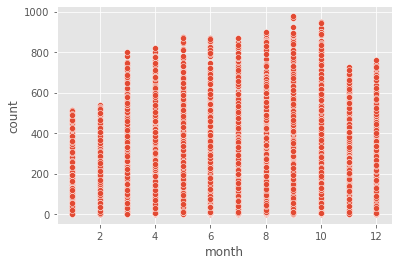

In [23]:
sns.scatterplot(data=df, x='month', y='count')

* It seams that in month 3 to 10 there is higher demand on bicycles.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

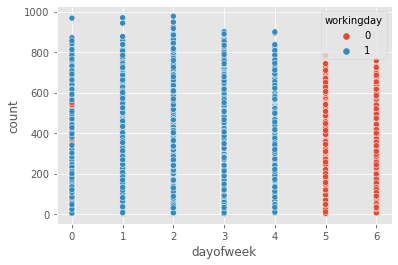

In [24]:
sns.scatterplot(data=df, x='dayofweek', y='count', hue ='workingday')

* It seams that on working days there is higher demand on bicycles.

<AxesSubplot:xlabel='year', ylabel='count'>

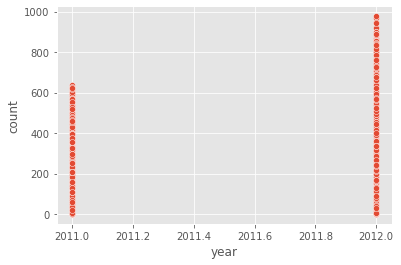

In [25]:
sns.scatterplot(data=df, x='year', y='count')

* It seams that in year 2012 there is higher demand on bicycles.

In [26]:
first_day = df.loc["2011-01-01"]
first_day.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


Text(0.5, 1.0, 'analysingthe effect of weather and day hours')

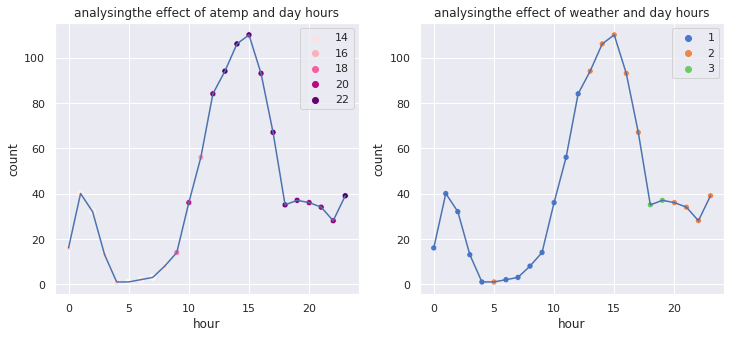

In [27]:
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(12,5))


sns.scatterplot(data=first_day, x='hour', y='count', hue = 'atemp', palette = 'RdPu', ax = axes[0])
sns.lineplot(data=first_day, x='hour', y='count', ax = axes[0])

sns.scatterplot(data=first_day, x='hour', y='count', hue = 'weather', palette = 'muted', ax=axes[1])
sns.lineplot(data=first_day, x='hour', y='count', ax=axes[1])

axes[0].set_title('analysingthe effect of atemp and day hours')
axes[1].set_title('analysingthe effect of weather and day hours')

* It seams that from 10 AM to 16 PM there is higher demand on bicycles.
* Also, it seems that the count of rented bicycles don't depend on tempreture/weather change during a day.

In [28]:
first_week = df.loc["2011-01-01":"2011-01-07"]
first_week

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-07 19:00:00,1,0,1,1,6.56,9.850,55,6.0032,3,92,95,2011,1,4,19
2011-01-07 20:00:00,1,0,1,1,7.38,10.605,47,7.0015,1,50,51,2011,1,4,20
2011-01-07 21:00:00,1,0,1,1,7.38,9.850,47,8.9981,0,39,39,2011,1,4,21


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

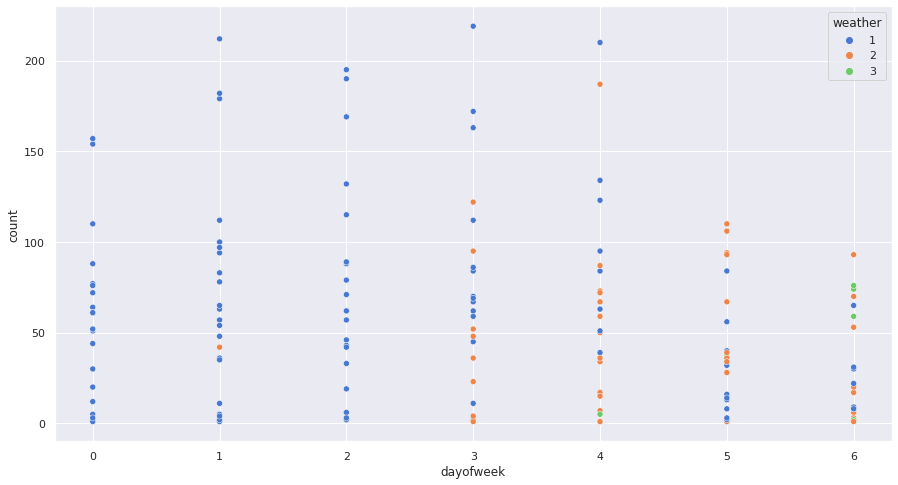

In [29]:
plt.figure(figsize=(15,8)) 
sns.scatterplot(data=first_week, x='dayofweek', y='count', hue = 'weather', palette = 'muted')

Also, in the first week of 2011, we have less demand on weekends.

In [30]:
df_g_month = df.groupby(pd.Grouper(freq='M')).mean()
df_g_month

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012,2011.0,1.0,3.025522,11.914153
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256,2011.0,2.0,3.000000,11.677130
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776,2011.0,3.0,3.002242,11.683857
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374,2011.0,4.0,3.059341,11.518681
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211,2011.0,5.0,2.842105,11.500000
2011-06-30,2.0,0.000000,0.684211,1.278509,28.191096,32.150910,58.291667,11.930099,42.982456,153.894737,196.877193,2011.0,6.0,3.263158,11.500000
2011-07-31,3.0,0.052632,0.631579,1.184211,29.967763,34.011656,60.403509,11.960793,57.335526,146.278509,203.614035,2011.0,7.0,3.052632,11.500000
2011-08-31,3.0,0.000000,0.789474,1.344298,29.667456,33.461711,62.166667,12.480543,38.552632,144.114035,182.666667,2011.0,8.0,2.736842,11.500000
2011-09-30,3.0,0.052980,0.629139,1.618102,25.141236,28.693256,74.830022,11.501445,40.421634,134.200883,174.622517,2011.0,9.0,3.169978,11.562914


<AxesSubplot:xlabel='month', ylabel='count'>

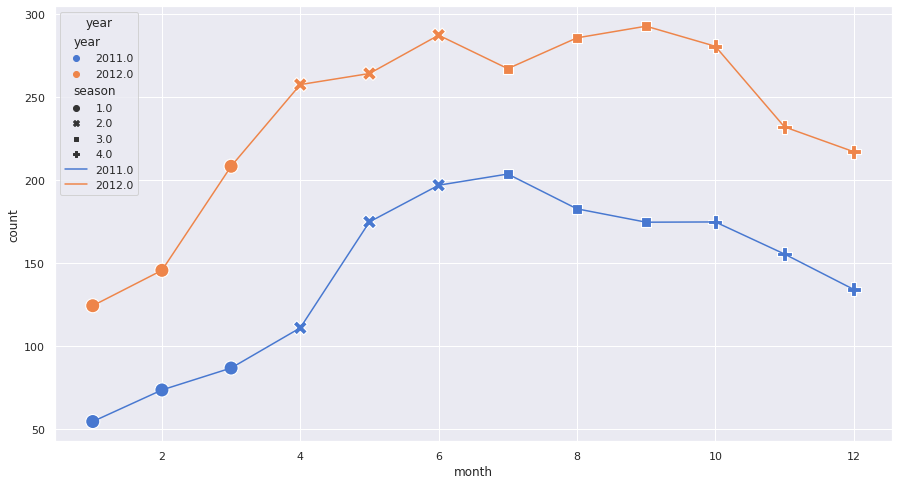

In [31]:
plt.figure(figsize=(15,8)) 
sns.scatterplot(data = df_g_month, x = 'month', y = 'count', hue = 'year', palette = 'muted', style = 'season', s = 200)
sns.lineplot(data = df_g_month, x = 'month', y = 'count', hue = 'year', palette = 'muted')

Also with mean values, we can see that:

- In year 2012, there is an increase in bicycle demand.
- In December, January, and February the number of rented bicycles decreases. (It is actually spring and end of winter)

Text(0.5, 1.0, 'windspeed and season effect')

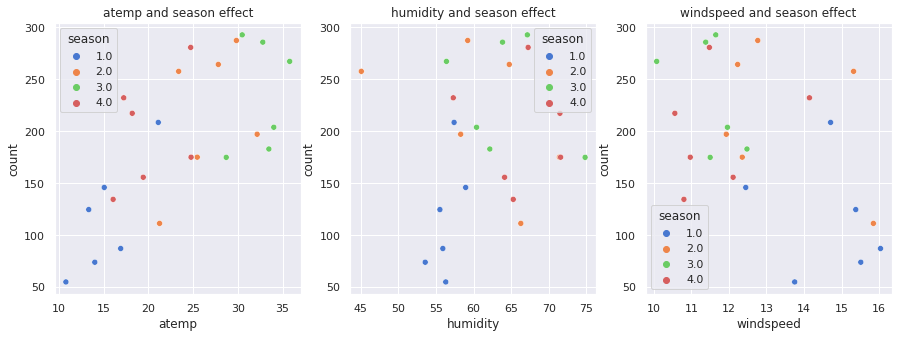

In [32]:
#weather related features
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15,5))


sns.scatterplot(data=df_g_month, x='atemp', y='count', hue = 'season', palette = 'muted',  ax = axes[0])

sns.scatterplot(data=df_g_month, x='humidity', y='count', hue = 'season', palette = 'muted',  ax=axes[1])

sns.scatterplot(data=df_g_month, x='windspeed', y='count', hue = 'season', palette = 'muted',  ax=axes[2])

axes[0].set_title('atemp and season effect')
axes[1].set_title('humidity and season effect')
axes[2].set_title('windspeed and season effect')

Text(0.5, 1.0, 'windspeed and weather effect')

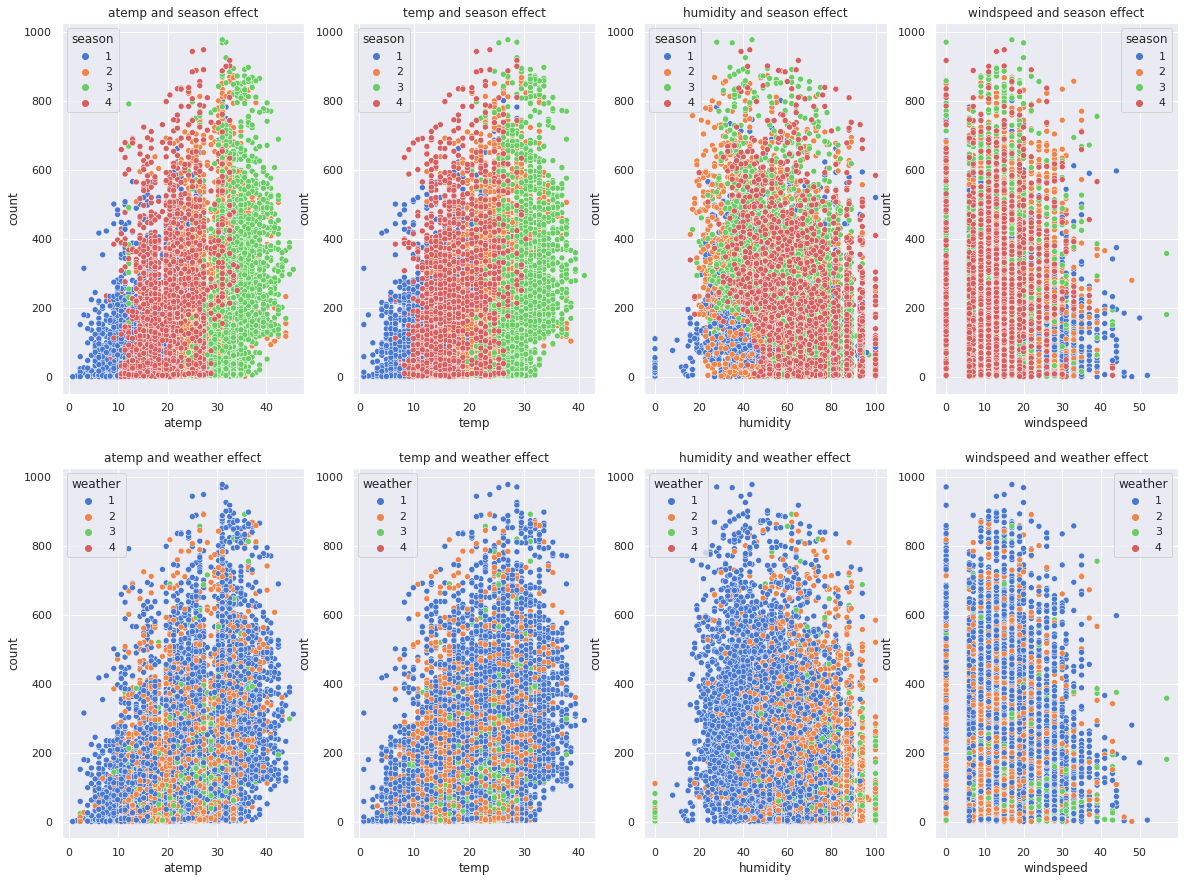

In [33]:
#weather related features
sns.set()
fig, axes = plt.subplots(2, 4, figsize=(20,15))


sns.scatterplot(data=df, x='atemp', y='count', hue = 'season', palette = 'muted',  ax = axes[0,0])

sns.scatterplot(data=df, x='temp', y='count', hue = 'season', palette = 'muted',  ax = axes[0,1])

sns.scatterplot(data=df, x='humidity', y='count', hue = 'season', palette = 'muted',  ax=axes[0,2])

sns.scatterplot(data=df, x='windspeed', y='count', hue = 'season', palette = 'muted',  ax=axes[0,3])



sns.scatterplot(data=df, x='atemp', y='count', hue = 'weather', palette = 'muted',  ax = axes[1,0])

sns.scatterplot(data=df, x='temp', y='count', hue = 'weather', palette = 'muted',  ax = axes[1,1])

sns.scatterplot(data=df, x='humidity', y='count', hue = 'weather', palette = 'muted',  ax=axes[1,2])

sns.scatterplot(data=df, x='windspeed', y='count', hue = 'weather', palette = 'muted',  ax=axes[1,3])



axes[0,0].set_title('atemp and season effect')
axes[0,1].set_title('temp and season effect')
axes[0,2].set_title('humidity and season effect')
axes[0,3].set_title('windspeed and season effect')

axes[1,0].set_title('atemp and weather effect')
axes[1,1].set_title('temp and weather effect')
axes[1,2].set_title('humidity and weather effect')
axes[1,3].set_title('windspeed and weather effect')

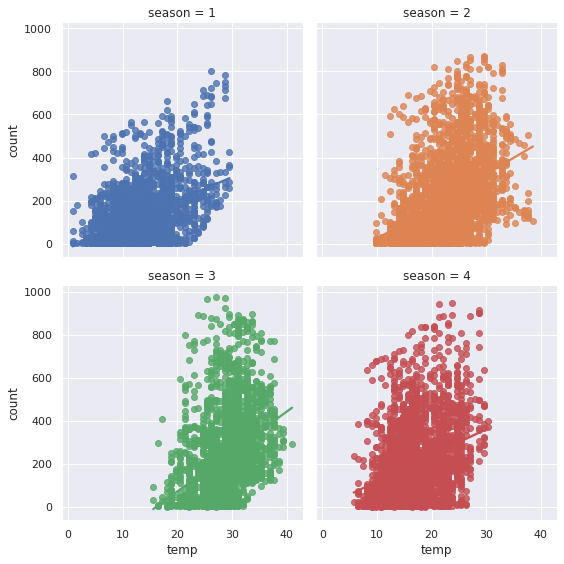

In [34]:
sns.lmplot(data=df,
           x='temp',
           y='count', 
           col='season',
           hue='season', 
           col_wrap=2,
           ci=None, 
           height= 4 
          )

## Feature engineering

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [36]:
df = pd.read_csv("./data/train.csv", index_col =0, parse_dates=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

y = df["count"]
X = df.drop(["count","casual", "registered"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

<Figure size 864x576 with 0 Axes>

In [38]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [39]:
x_train['dayofweek'] = x_train.index.dayofweek
x_train['month'] = x_train.index.month
x_train['year'] = x_train.index.year
x_train['hour'] = x_train.index.hour

In [40]:
x_test['dayofweek'] = x_test.index.dayofweek
x_test['month'] = x_test.index.month
x_test['year'] = x_test.index.year
x_test['hour'] = x_test.index.hour

In [41]:
x_train.drop(columns=['atemp','season'], inplace = True)
x_train

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,month,year,hour
datetime,,,,,,,,,,
2011-03-11 06:00:00,0,1,1,10.66,81,19.0012,4,3,2011,6
2011-04-14 15:00:00,0,1,1,24.60,31,6.0032,3,4,2011,15
2011-04-12 22:00:00,0,1,2,16.40,94,19.9995,1,4,2011,22
2011-05-04 00:00:00,0,1,3,21.32,77,11.0014,2,5,2011,0
2011-11-13 03:00:00,0,0,2,14.76,62,8.9981,6,11,2011,3
...,...,...,...,...,...,...,...,...,...,...
2011-01-16 02:00:00,0,0,1,10.66,56,6.0032,6,1,2011,2
2011-01-04 11:00:00,0,1,1,9.02,51,19.9995,1,1,2011,11
2012-06-15 08:00:00,0,1,1,24.60,69,11.0014,4,6,2012,8


In [42]:
x_test.drop(columns=['atemp','season'], inplace = True)
x_test

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,month,year,hour
datetime,,,,,,,,,,
2012-06-05 19:00:00,0,1,1,23.78,46,16.9979,1,6,2012,19
2011-04-02 19:00:00,0,0,1,14.76,53,23.9994,5,4,2011,19
2011-06-11 20:00:00,0,0,1,27.88,74,16.9979,5,6,2011,20
2011-08-18 01:00:00,0,1,2,27.06,65,11.0014,3,8,2011,1
2011-02-15 13:00:00,0,1,1,13.12,21,15.0013,1,2,2011,13
...,...,...,...,...,...,...,...,...,...,...
2012-07-16 18:00:00,0,1,1,34.44,53,0.0000,0,7,2012,18
2012-12-07 19:00:00,0,1,2,15.58,76,0.0000,4,12,2012,19
2011-07-03 15:00:00,0,0,1,34.44,53,19.9995,6,7,2011,15


In [43]:
num_col = ['temp','humidity', 'windspeed'] #same result if year is considered numerical

cat1_col = ['weather', 'dayofweek', 'month', 'hour', 'year']

cat2_col = ['holiday', 'workingday']

In [44]:
cat_pipeline = Pipeline([('cat_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    
cat_pipeline

Pipeline(steps=[('cat_ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [45]:
num_pipeline = Pipeline([
    ('num_scale',RobustScaler())
])

num_pipeline


Pipeline(steps=[('num_scale', RobustScaler())])

In [46]:
all_fe_column_transformer = ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_col),
    ("categorical pipeline", cat_pipeline, cat1_col)
], remainder = 'passthrough')

all_fe_column_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical pipeline',
                                 Pipeline(steps=[('num_scale',
                                                  RobustScaler())]),
                                 ['temp', 'humidity', 'windspeed']),
                                ('categorical pipeline',
                                 Pipeline(steps=[('cat_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['weather', 'dayofweek', 'month', 'hour',
                                  'year'])])

In [47]:
x_train_fe = all_fe_column_transformer.fit_transform(x_train)
x_train_fe 

<8164x48 sparse matrix of type '<class 'numpy.float64'>'
	with 58260 stored elements in Compressed Sparse Row format>

In [48]:
x_train_fe.todense().shape

(8164, 48)

In [49]:
x_test.head()

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,month,year,hour
datetime,,,,,,,,,,
2012-06-05 19:00:00,0,1,1,23.78,46,16.9979,1,6,2012,19
2011-04-02 19:00:00,0,0,1,14.76,53,23.9994,5,4,2011,19
2011-06-11 20:00:00,0,0,1,27.88,74,16.9979,5,6,2011,20
2011-08-18 01:00:00,0,1,2,27.06,65,11.0014,3,8,2011,1
2011-02-15 13:00:00,0,1,1,13.12,21,15.0013,1,2,2011,13


In [50]:
x_test.holiday.unique()

array([0, 1])

In [51]:
x_test_fe = all_fe_column_transformer.transform(x_test)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
x_test_fe

<2722x48 sparse matrix of type '<class 'numpy.float64'>'
	with 19475 stored elements in Compressed Sparse Row format>

## Linear Regression model

In [53]:
m = LinearRegression()
m.fit(x_train_fe , y_train)


LinearRegression()

In [54]:
y_train_pred = m.predict(x_train_fe)
round(m.score(x_train_fe, y_train),3)

0.694

In [55]:
y_train_pred

array([-22.94010878, 251.72686326,  37.68916007, ..., 467.02932206,
       426.43469667, -75.72760987])

In [56]:
y_pred = m.predict(x_test_fe)
round(m.score(x_test_fe, y_test),3)

0.696

In [57]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 9808.13
Mean absolute error: 74.25
Coefficient of determination: 0.70


In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

99.03601924517483

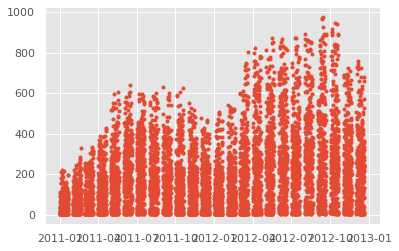

In [59]:
plt.plot(y_train, '.')

### Check some of the assumptions in linear regression

In [60]:
# E(e) = 0 (residuals...)

residuals = y_train_pred - y_train
residuals.mean()

-3.672820118701155e-16

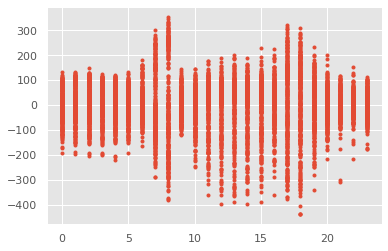

In [61]:
# Homoscedasticity (same variance of the error in different intervals)

plt.plot(x_train['hour'],residuals,'.')

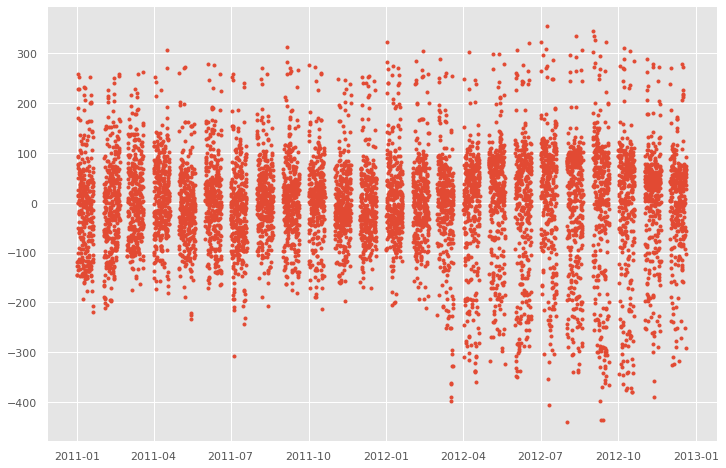

In [62]:
# Homoscedasticity (same variance of the error in different intervals)
plt.figure(figsize = (12, 8))
plt.plot(x_train.index,residuals,'.')

<AxesSubplot:xlabel='count', ylabel='Count'>

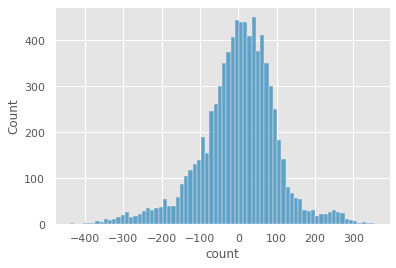

In [63]:
# Normal distribution of residuals
sns.histplot(data= residuals)

### cross validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cross_val = cross_val_score(m,
                           x_train_fe, 
                           y_train,         
                           cv=5)  

In [66]:
cross_val

array([0.66660868, 0.6943164 , 0.68698172, 0.69059842, 0.70665405])

In [67]:
cross_val.mean()

0.6890318537894239

## Expanding some of the features (polynomial without interactions)

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [70]:
hour_poly= poly.fit_transform(x_train[['hour']])

In [71]:
poly.get_feature_names_out()

array(['1', 'hour', 'hour^2', 'hour^3', 'hour^4'], dtype=object)

In [72]:
hour_poly_df = pd.DataFrame(hour_poly)

In [73]:
x_train.drop(columns =['hour'], inplace = True)

In [74]:
hour_poly_df.head()

,0,1,2,3,4
0,1.0,6.0,36.0,216.0,1296.0
1,1.0,15.0,225.0,3375.0,50625.0
2,1.0,22.0,484.0,10648.0,234256.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,3.0,9.0,27.0,81.0


In [75]:
hour_poly_df.columns = poly.get_feature_names_out()
hour_poly_df.head()

,1,hour,hour^2,hour^3,hour^4
0,1.0,6.0,36.0,216.0,1296.0
1,1.0,15.0,225.0,3375.0,50625.0
2,1.0,22.0,484.0,10648.0,234256.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,3.0,9.0,27.0,81.0


In [76]:
hour_poly_df.index = x_train.index

In [77]:
month_poly= poly.fit_transform(x_train[['month']])

In [78]:
poly.get_feature_names_out()

array(['1', 'month', 'month^2', 'month^3', 'month^4'], dtype=object)

In [79]:
month_poly_df = pd.DataFrame(month_poly)

In [80]:
x_train.drop(columns =['month'], inplace = True)

In [81]:
month_poly_df.head()

,0,1,2,3,4
0,1.0,3.0,9.0,27.0,81.0
1,1.0,4.0,16.0,64.0,256.0
2,1.0,4.0,16.0,64.0,256.0
3,1.0,5.0,25.0,125.0,625.0
4,1.0,11.0,121.0,1331.0,14641.0


In [82]:
month_poly_df.columns = poly.get_feature_names_out()
month_poly_df.head()

,1,month,month^2,month^3,month^4
0,1.0,3.0,9.0,27.0,81.0
1,1.0,4.0,16.0,64.0,256.0
2,1.0,4.0,16.0,64.0,256.0
3,1.0,5.0,25.0,125.0,625.0
4,1.0,11.0,121.0,1331.0,14641.0


In [83]:
month_poly_df.index = x_train.index

In [84]:
merged_x = pd.concat([x_train, month_poly_df, hour_poly_df] , axis = 1)
merged_x

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,year,1,month,month^2,month^3,month^4,1,hour,hour^2,hour^3,hour^4
datetime,,,,,,,,,,,,,,,,,,
2011-03-11 06:00:00,0,1,1,10.66,81,19.0012,4,2011,1.0,3.0,9.0,27.0,81.0,1.0,6.0,36.0,216.0,1296.0
2011-04-14 15:00:00,0,1,1,24.60,31,6.0032,3,2011,1.0,4.0,16.0,64.0,256.0,1.0,15.0,225.0,3375.0,50625.0
2011-04-12 22:00:00,0,1,2,16.40,94,19.9995,1,2011,1.0,4.0,16.0,64.0,256.0,1.0,22.0,484.0,10648.0,234256.0
2011-05-04 00:00:00,0,1,3,21.32,77,11.0014,2,2011,1.0,5.0,25.0,125.0,625.0,1.0,0.0,0.0,0.0,0.0
2011-11-13 03:00:00,0,0,2,14.76,62,8.9981,6,2011,1.0,11.0,121.0,1331.0,14641.0,1.0,3.0,9.0,27.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-16 02:00:00,0,0,1,10.66,56,6.0032,6,2011,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,8.0,16.0
2011-01-04 11:00:00,0,1,1,9.02,51,19.9995,1,2011,1.0,1.0,1.0,1.0,1.0,1.0,11.0,121.0,1331.0,14641.0
2012-06-15 08:00:00,0,1,1,24.60,69,11.0014,4,2012,1.0,6.0,36.0,216.0,1296.0,1.0,8.0,64.0,512.0,4096.0


In [85]:
num_col = ['temp','humidity', 'windspeed', 'year', 'month', 'hour', "month^2", "month^3", "month^4", "hour^2","hour^3","hour^4"]

cat1_col = ['weather', 'dayofweek']

cat2_col = ['holiday', 'workingday']

In [86]:
cat_pipeline = Pipeline([('cat_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    
cat_pipeline

Pipeline(steps=[('cat_ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [87]:
num_pipeline = Pipeline([
    ('num_scale',RobustScaler())
])

num_pipeline


Pipeline(steps=[('num_scale', RobustScaler())])

In [88]:
all_fe_column_transformer = ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_col),
    ("categorical pipeline", cat_pipeline, cat1_col)
], remainder = 'passthrough')

all_fe_column_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical pipeline',
                                 Pipeline(steps=[('num_scale',
                                                  RobustScaler())]),
                                 ['temp', 'humidity', 'windspeed', 'year',
                                  'month', 'hour', 'month^2', 'month^3',
                                  'month^4', 'hour^2', 'hour^3', 'hour^4']),
                                ('categorical pipeline',
                                 Pipeline(steps=[('cat_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['weather', 'dayofweek'])])

In [89]:
x_train_fe = all_fe_column_transformer.fit_transform(merged_x)

************************************************************

In [90]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [91]:
hour_poly_t= poly.fit_transform(x_test[['hour']])

In [92]:
poly.get_feature_names_out()

array(['1', 'hour', 'hour^2', 'hour^3', 'hour^4'], dtype=object)

In [93]:
hour_poly_df_t = pd.DataFrame(hour_poly_t)

In [94]:
x_test.drop(columns =['hour'], inplace = True)

In [95]:
hour_poly_df_t.head()

,0,1,2,3,4
0,1.0,19.0,361.0,6859.0,130321.0
1,1.0,19.0,361.0,6859.0,130321.0
2,1.0,20.0,400.0,8000.0,160000.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,13.0,169.0,2197.0,28561.0


In [96]:
hour_poly_df_t.columns = poly.get_feature_names_out()
hour_poly_df_t.head()

,1,hour,hour^2,hour^3,hour^4
0,1.0,19.0,361.0,6859.0,130321.0
1,1.0,19.0,361.0,6859.0,130321.0
2,1.0,20.0,400.0,8000.0,160000.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,13.0,169.0,2197.0,28561.0


In [97]:
hour_poly_df_t.index = x_test.index

In [98]:
month_poly_t= poly.fit_transform(x_test[['month']])

In [99]:
poly.get_feature_names_out()

array(['1', 'month', 'month^2', 'month^3', 'month^4'], dtype=object)

In [100]:
month_poly_df_t = pd.DataFrame(month_poly_t)

In [101]:
x_test.drop(columns =['month'], inplace = True)

In [102]:
month_poly_df_t.head()

,0,1,2,3,4
0,1.0,6.0,36.0,216.0,1296.0
1,1.0,4.0,16.0,64.0,256.0
2,1.0,6.0,36.0,216.0,1296.0
3,1.0,8.0,64.0,512.0,4096.0
4,1.0,2.0,4.0,8.0,16.0


In [103]:
month_poly_df_t.columns = poly.get_feature_names_out()
month_poly_df_t.head()

,1,month,month^2,month^3,month^4
0,1.0,6.0,36.0,216.0,1296.0
1,1.0,4.0,16.0,64.0,256.0
2,1.0,6.0,36.0,216.0,1296.0
3,1.0,8.0,64.0,512.0,4096.0
4,1.0,2.0,4.0,8.0,16.0


In [104]:
month_poly_df_t.index = x_test.index

In [105]:
merged_x_t = pd.concat([x_test, month_poly_df_t, hour_poly_df_t] , axis = 1)
merged_x_t

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,year,1,month,month^2,month^3,month^4,1,hour,hour^2,hour^3,hour^4
datetime,,,,,,,,,,,,,,,,,,
2012-06-05 19:00:00,0,1,1,23.78,46,16.9979,1,2012,1.0,6.0,36.0,216.0,1296.0,1.0,19.0,361.0,6859.0,130321.0
2011-04-02 19:00:00,0,0,1,14.76,53,23.9994,5,2011,1.0,4.0,16.0,64.0,256.0,1.0,19.0,361.0,6859.0,130321.0
2011-06-11 20:00:00,0,0,1,27.88,74,16.9979,5,2011,1.0,6.0,36.0,216.0,1296.0,1.0,20.0,400.0,8000.0,160000.0
2011-08-18 01:00:00,0,1,2,27.06,65,11.0014,3,2011,1.0,8.0,64.0,512.0,4096.0,1.0,1.0,1.0,1.0,1.0
2011-02-15 13:00:00,0,1,1,13.12,21,15.0013,1,2011,1.0,2.0,4.0,8.0,16.0,1.0,13.0,169.0,2197.0,28561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-16 18:00:00,0,1,1,34.44,53,0.0000,0,2012,1.0,7.0,49.0,343.0,2401.0,1.0,18.0,324.0,5832.0,104976.0
2012-12-07 19:00:00,0,1,2,15.58,76,0.0000,4,2012,1.0,12.0,144.0,1728.0,20736.0,1.0,19.0,361.0,6859.0,130321.0
2011-07-03 15:00:00,0,0,1,34.44,53,19.9995,6,2011,1.0,7.0,49.0,343.0,2401.0,1.0,15.0,225.0,3375.0,50625.0


In [106]:
x_test_fe = all_fe_column_transformer.fit_transform(merged_x_t)

In [107]:
m = LinearRegression()
m.fit(merged_x.values, y_train)

ypred_poly = m.predict(merged_x.values)
m.score(merged_x.values, y_train)

0.536856322023862

In [108]:
m.score(merged_x_t.values, y_test)

0.550690142587417

In [109]:
# trying regularization (feature selection)
m_lasso = Lasso(alpha=2, random_state=31, max_iter = 100000)
m_lasso.fit(merged_x.values, y_train)
ypred_lasso = m_lasso.predict(merged_x.values)

m_lasso_r2 = m_lasso.score(merged_x.values, y_train)
m_lasso_r2

0.534825131793574

In [110]:
m_lasso.coef_

array([-0.00000000e+00,  0.00000000e+00, -2.02740702e+01,  2.57830678e+00,
       -5.25954687e-01, -4.89463671e-01,  0.00000000e+00,  8.48039206e+01,
        0.00000000e+00,  0.00000000e+00,  8.66829625e+00, -1.22885850e+00,
        4.67953089e-02,  0.00000000e+00,  0.00000000e+00,  2.80454666e+00,
       -6.78222360e-02, -2.18985249e-03])

In [111]:
pd.DataFrame({'feature': merged_x.columns, 'coefficient': m_lasso.coef_}).\
sort_values('coefficient')

,feature,coefficient
2,weather,-20.274070
11,month^3,-1.228859
4,humidity,-0.525955
5,windspeed,-0.489464
16,hour^3,-0.067822
17,hour^4,-0.002190
14,hour,0.000000
13,1,0.000000
9,month,0.000000
0,holiday,-0.000000


## Trying polynomial for the real numeric columns (without interaction)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score


%matplotlib inline

In [113]:
df = pd.read_csv("./data/train.csv", index_col =0, parse_dates=True)

In [114]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

y = df["count"]
X = df.drop(["count","casual", "registered"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

<Figure size 864x576 with 0 Axes>

In [115]:
x_train['dayofweek'] = x_train.index.dayofweek
x_train['month'] = x_train.index.month
x_train['year'] = x_train.index.year
x_train['hour'] = x_train.index.hour

In [116]:
x_test['dayofweek'] = x_test.index.dayofweek
x_test['month'] = x_test.index.month
x_test['year'] = x_test.index.year
x_test['hour'] = x_test.index.hour

In [117]:
x_train.drop(columns=['atemp','season'], inplace = True)

In [118]:
x_test.drop(columns=['atemp','season'], inplace = True)

In [119]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [120]:
temp_poly= poly.fit_transform(x_train[['temp']])

In [121]:
poly.get_feature_names_out()

array(['1', 'temp', 'temp^2', 'temp^3', 'temp^4'], dtype=object)

In [122]:
temp_poly_df = pd.DataFrame(temp_poly)

In [123]:
x_train.drop(columns =['temp'], inplace = True)

In [124]:
temp_poly_df.head()

,0,1,2,3,4
0,1.0,10.66,113.6356,1211.355496,12913.049587
1,1.0,24.60,605.1600,14886.936000,366218.625600
2,1.0,16.40,268.9600,4410.944000,72339.481600
3,1.0,21.32,454.5424,9690.843968,206608.793398
4,1.0,14.76,217.8576,3215.578176,47461.933878


In [125]:
temp_poly_df.columns = poly.get_feature_names_out()
temp_poly_df.head()

,1,temp,temp^2,temp^3,temp^4
0,1.0,10.66,113.6356,1211.355496,12913.049587
1,1.0,24.60,605.1600,14886.936000,366218.625600
2,1.0,16.40,268.9600,4410.944000,72339.481600
3,1.0,21.32,454.5424,9690.843968,206608.793398
4,1.0,14.76,217.8576,3215.578176,47461.933878


In [126]:
temp_poly_df.index = x_train.index
temp_poly_df.head()

,1,temp,temp^2,temp^3,temp^4
datetime,,,,,
2011-03-11 06:00:00,1.0,10.66,113.6356,1211.355496,12913.049587
2011-04-14 15:00:00,1.0,24.60,605.1600,14886.936000,366218.625600
2011-04-12 22:00:00,1.0,16.40,268.9600,4410.944000,72339.481600
2011-05-04 00:00:00,1.0,21.32,454.5424,9690.843968,206608.793398
2011-11-13 03:00:00,1.0,14.76,217.8576,3215.578176,47461.933878


In [127]:
humidity_poly= poly.fit_transform(x_train[['humidity']])

In [128]:
poly.get_feature_names_out()

array(['1', 'humidity', 'humidity^2', 'humidity^3', 'humidity^4'],
      dtype=object)

In [129]:
humidity_poly_df = pd.DataFrame(humidity_poly)

In [130]:
x_train.drop(columns =['humidity'], inplace = True)

In [131]:
humidity_poly_df.head()

,0,1,2,3,4
0,1.0,81.0,6561.0,531441.0,43046721.0
1,1.0,31.0,961.0,29791.0,923521.0
2,1.0,94.0,8836.0,830584.0,78074896.0
3,1.0,77.0,5929.0,456533.0,35153041.0
4,1.0,62.0,3844.0,238328.0,14776336.0


In [132]:
humidity_poly_df.columns = poly.get_feature_names_out()
humidity_poly_df.head()

,1,humidity,humidity^2,humidity^3,humidity^4
0,1.0,81.0,6561.0,531441.0,43046721.0
1,1.0,31.0,961.0,29791.0,923521.0
2,1.0,94.0,8836.0,830584.0,78074896.0
3,1.0,77.0,5929.0,456533.0,35153041.0
4,1.0,62.0,3844.0,238328.0,14776336.0


In [133]:
humidity_poly_df.index = x_train.index

In [134]:
windspeed_poly= poly.fit_transform(x_train[['windspeed']])

In [135]:
poly.get_feature_names_out()

array(['1', 'windspeed', 'windspeed^2', 'windspeed^3', 'windspeed^4'],
      dtype=object)

In [136]:
windspeed_poly_df = pd.DataFrame(windspeed_poly)

In [137]:
x_train.drop(columns =['windspeed'], inplace = True)

In [138]:
windspeed_poly_df.head()

,0,1,2,3,4
0,1.0,19.0012,361.045601,6860.299682,130353.926319
1,1.0,6.0032,36.038410,216.345784,1298.767013
2,1.0,19.9995,399.980000,7999.400015,159984.000600
3,1.0,11.0014,121.030802,1331.508265,14648.455023
4,1.0,8.9981,80.965804,728.538397,6555.461354


In [139]:
windspeed_poly_df.columns = poly.get_feature_names_out()
windspeed_poly_df.head()

,1,windspeed,windspeed^2,windspeed^3,windspeed^4
0,1.0,19.0012,361.045601,6860.299682,130353.926319
1,1.0,6.0032,36.038410,216.345784,1298.767013
2,1.0,19.9995,399.980000,7999.400015,159984.000600
3,1.0,11.0014,121.030802,1331.508265,14648.455023
4,1.0,8.9981,80.965804,728.538397,6555.461354


In [140]:
windspeed_poly_df.index = x_train.index

In [141]:
merged_x = pd.concat([x_train, temp_poly_df, humidity_poly_df, windspeed_poly_df] , axis = 1)
merged_x

,holiday,workingday,weather,dayofweek,month,year,hour,1,temp,temp^2,...,1,humidity,humidity^2,humidity^3,humidity^4,1,windspeed,windspeed^2,windspeed^3,windspeed^4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-03-11 06:00:00,0,1,1,4,3,2011,6,1.0,10.66,113.6356,...,1.0,81.0,6561.0,531441.0,43046721.0,1.0,19.0012,361.045601,6860.299682,130353.926319
2011-04-14 15:00:00,0,1,1,3,4,2011,15,1.0,24.60,605.1600,...,1.0,31.0,961.0,29791.0,923521.0,1.0,6.0032,36.038410,216.345784,1298.767013
2011-04-12 22:00:00,0,1,2,1,4,2011,22,1.0,16.40,268.9600,...,1.0,94.0,8836.0,830584.0,78074896.0,1.0,19.9995,399.980000,7999.400015,159984.000600
2011-05-04 00:00:00,0,1,3,2,5,2011,0,1.0,21.32,454.5424,...,1.0,77.0,5929.0,456533.0,35153041.0,1.0,11.0014,121.030802,1331.508265,14648.455023
2011-11-13 03:00:00,0,0,2,6,11,2011,3,1.0,14.76,217.8576,...,1.0,62.0,3844.0,238328.0,14776336.0,1.0,8.9981,80.965804,728.538397,6555.461354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-16 02:00:00,0,0,1,6,1,2011,2,1.0,10.66,113.6356,...,1.0,56.0,3136.0,175616.0,9834496.0,1.0,6.0032,36.038410,216.345784,1298.767013
2011-01-04 11:00:00,0,1,1,1,1,2011,11,1.0,9.02,81.3604,...,1.0,51.0,2601.0,132651.0,6765201.0,1.0,19.9995,399.980000,7999.400015,159984.000600
2012-06-15 08:00:00,0,1,1,4,6,2012,8,1.0,24.60,605.1600,...,1.0,69.0,4761.0,328509.0,22667121.0,1.0,11.0014,121.030802,1331.508265,14648.455023


In [142]:
num_col = ['temp','humidity', 'windspeed', 'year', 'month', 'hour',
           "temp^2", "temp^3", "temp^4", "humidity^2", "humidity^3", "humidity^4",
          'windspeed^2', 'windspeed^3', 'windspeed^4']

cat1_col = ['weather', 'dayofweek']

cat2_col = ['holiday', 'workingday']

In [143]:
cat_pipeline = Pipeline([('cat_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    
cat_pipeline

Pipeline(steps=[('cat_ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [144]:
num_pipeline = Pipeline([
    ('num_scale',RobustScaler())
])

num_pipeline


Pipeline(steps=[('num_scale', RobustScaler())])

In [145]:
all_fe_column_transformer = ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_col),
    ("categorical pipeline", cat_pipeline, cat1_col)
], remainder = 'passthrough')

all_fe_column_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical pipeline',
                                 Pipeline(steps=[('num_scale',
                                                  RobustScaler())]),
                                 ['temp', 'humidity', 'windspeed', 'year',
                                  'month', 'hour', 'temp^2', 'temp^3', 'temp^4',
                                  'humidity^2', 'humidity^3', 'humidity^4',
                                  'windspeed^2', 'windspeed^3',
                                  'windspeed^4']),
                                ('categorical pipeline',
                                 Pipeline(steps=[('cat_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['weather', 'dayofweek'])])

In [146]:
x_train_fe = all_fe_column_transformer.fit_transform(merged_x)

In [147]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [148]:
temp_poly_t= poly.fit_transform(x_test[['temp']])

In [149]:
poly.get_feature_names_out()

array(['1', 'temp', 'temp^2', 'temp^3', 'temp^4'], dtype=object)

In [150]:
temp_poly_df_t = pd.DataFrame(temp_poly_t)

In [151]:
x_test.drop(columns =['temp'], inplace = True)

In [152]:
temp_poly_df_t.head()

,0,1,2,3,4
0,1.0,23.78,565.4884,13447.314152,319777.130535
1,1.0,14.76,217.8576,3215.578176,47461.933878
2,1.0,27.88,777.2944,21670.967872,604186.584271
3,1.0,27.06,732.2436,19814.511816,536180.689741
4,1.0,13.12,172.1344,2258.403328,29630.251663


In [153]:
temp_poly_df_t.columns = poly.get_feature_names_out()
temp_poly_df_t.head()

,1,temp,temp^2,temp^3,temp^4
0,1.0,23.78,565.4884,13447.314152,319777.130535
1,1.0,14.76,217.8576,3215.578176,47461.933878
2,1.0,27.88,777.2944,21670.967872,604186.584271
3,1.0,27.06,732.2436,19814.511816,536180.689741
4,1.0,13.12,172.1344,2258.403328,29630.251663


In [154]:
temp_poly_df_t.index = x_test.index

In [155]:
humidity_poly_t= poly.fit_transform(x_test[['humidity']])

In [156]:
poly.get_feature_names_out()

array(['1', 'humidity', 'humidity^2', 'humidity^3', 'humidity^4'],
      dtype=object)

In [157]:
humidity_poly_df_t = pd.DataFrame(humidity_poly_t)

In [158]:
x_test.drop(columns =['humidity'], inplace = True)

In [159]:
humidity_poly_df_t.head()

,0,1,2,3,4
0,1.0,46.0,2116.0,97336.0,4477456.0
1,1.0,53.0,2809.0,148877.0,7890481.0
2,1.0,74.0,5476.0,405224.0,29986576.0
3,1.0,65.0,4225.0,274625.0,17850625.0
4,1.0,21.0,441.0,9261.0,194481.0


In [160]:
humidity_poly_df_t.columns = poly.get_feature_names_out()
humidity_poly_df_t.head()

,1,humidity,humidity^2,humidity^3,humidity^4
0,1.0,46.0,2116.0,97336.0,4477456.0
1,1.0,53.0,2809.0,148877.0,7890481.0
2,1.0,74.0,5476.0,405224.0,29986576.0
3,1.0,65.0,4225.0,274625.0,17850625.0
4,1.0,21.0,441.0,9261.0,194481.0


In [161]:
humidity_poly_df_t.index = x_test.index

In [162]:
windspeed_poly_t= poly.fit_transform(x_test[['windspeed']])

In [163]:
poly.get_feature_names_out()

array(['1', 'windspeed', 'windspeed^2', 'windspeed^3', 'windspeed^4'],
      dtype=object)

In [164]:
windspeed_poly_df_t = pd.DataFrame(windspeed_poly_t)

In [165]:
x_test.drop(columns =['windspeed'], inplace = True)

In [166]:
windspeed_poly_df_t.head()

,0,1,2,3,4
0,1.0,16.9979,288.928604,4911.179525,83479.738446
1,1.0,23.9994,575.971200,13822.963226,331742.823644
2,1.0,16.9979,288.928604,4911.179525,83479.738446
3,1.0,11.0014,121.030802,1331.508265,14648.455023
4,1.0,15.0013,225.039002,3375.877576,50642.552282


In [167]:
windspeed_poly_df_t.columns = poly.get_feature_names_out()
windspeed_poly_df_t.head()

,1,windspeed,windspeed^2,windspeed^3,windspeed^4
0,1.0,16.9979,288.928604,4911.179525,83479.738446
1,1.0,23.9994,575.971200,13822.963226,331742.823644
2,1.0,16.9979,288.928604,4911.179525,83479.738446
3,1.0,11.0014,121.030802,1331.508265,14648.455023
4,1.0,15.0013,225.039002,3375.877576,50642.552282


In [168]:
windspeed_poly_df_t.index = x_test.index

In [169]:
merged_x_t = pd.concat([x_test, temp_poly_df_t, humidity_poly_df_t, windspeed_poly_df_t] , axis = 1)
merged_x_t

,holiday,workingday,weather,dayofweek,month,year,hour,1,temp,temp^2,...,1,humidity,humidity^2,humidity^3,humidity^4,1,windspeed,windspeed^2,windspeed^3,windspeed^4
datetime,,,,,,,,,,,,,,,,,,,,,
2012-06-05 19:00:00,0,1,1,1,6,2012,19,1.0,23.78,565.4884,...,1.0,46.0,2116.0,97336.0,4477456.0,1.0,16.9979,288.928604,4911.179525,83479.738446
2011-04-02 19:00:00,0,0,1,5,4,2011,19,1.0,14.76,217.8576,...,1.0,53.0,2809.0,148877.0,7890481.0,1.0,23.9994,575.971200,13822.963226,331742.823644
2011-06-11 20:00:00,0,0,1,5,6,2011,20,1.0,27.88,777.2944,...,1.0,74.0,5476.0,405224.0,29986576.0,1.0,16.9979,288.928604,4911.179525,83479.738446
2011-08-18 01:00:00,0,1,2,3,8,2011,1,1.0,27.06,732.2436,...,1.0,65.0,4225.0,274625.0,17850625.0,1.0,11.0014,121.030802,1331.508265,14648.455023
2011-02-15 13:00:00,0,1,1,1,2,2011,13,1.0,13.12,172.1344,...,1.0,21.0,441.0,9261.0,194481.0,1.0,15.0013,225.039002,3375.877576,50642.552282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-16 18:00:00,0,1,1,0,7,2012,18,1.0,34.44,1186.1136,...,1.0,53.0,2809.0,148877.0,7890481.0,1.0,0.0000,0.000000,0.000000,0.000000
2012-12-07 19:00:00,0,1,2,4,12,2012,19,1.0,15.58,242.7364,...,1.0,76.0,5776.0,438976.0,33362176.0,1.0,0.0000,0.000000,0.000000,0.000000
2011-07-03 15:00:00,0,0,1,6,7,2011,15,1.0,34.44,1186.1136,...,1.0,53.0,2809.0,148877.0,7890481.0,1.0,19.9995,399.980000,7999.400015,159984.000600


In [170]:
x_test_fe = all_fe_column_transformer.fit_transform(merged_x_t)

In [171]:
m = LinearRegression()
m.fit(merged_x.values, y_train)

ypred_poly = m.predict(merged_x.values)
m.score(merged_x.values, y_train)

0.3932653688921287

In [172]:
m.score(merged_x_t.values, y_test)

0.3962852147394066

### Regularization with lasso

In [173]:
m_lasso = Lasso(alpha=2, random_state=31, max_iter = 100000)
m_lasso.fit(merged_x.values, y_train)
ypred_lasso = m_lasso.predict(merged_x.values)

m_lasso_r2 = m_lasso.score(merged_x.values, y_train)
m_lasso_r2

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.102e+07, tolerance: 2.694e+04
  model = cd_fast.enet_coordinate_descent(


0.3920122033098242

In [174]:
m_lasso_r2_t = m_lasso.score(merged_x_t.values, y_test)
m_lasso_r2_t 

0.39739305434604544

#### Hyperparameter optimisation for Lasso

In [175]:
param_grid = {
    'alpha': [2, 3, 4],
    'max_iter': [10, 100, 1000, 10000],
}
param_grid

{'alpha': [2, 3, 4], 'max_iter': [10, 100, 1000, 10000]}

In [176]:
cv = GridSearchCV(m_lasso, 
                  param_grid, 
                  return_train_score=True, 
                  scoring='r2', 
                  cv=5, #number of cross-validation folds
                  verbose=2,#talks to us a bit
                  n_jobs=-1 #tells sklearn to use all cores to run multiple jobs in parallel
                 )


In [177]:
cv.fit(merged_x.values, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.705e+07, tolerance: 2.172e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.856e+07, tolerance: 2.168e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.611e+07, tolerance: 2.172e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.755e+07, tolerance: 2.148e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.753e+07, tolerance: 2.148e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.874e+07, tolerance: 2.168e+04
  model = cd_fast.enet_coordinate_descent(
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

GridSearchCV(cv=5, estimator=Lasso(alpha=2, max_iter=100000, random_state=31),
             n_jobs=-1,
             param_grid={'alpha': [2, 3, 4],
                         'max_iter': [10, 100, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=2)

In [178]:
res = pd.DataFrame(cv.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040040,0.013317,0.002609,0.001371,2,10,"{'alpha': 2, 'max_iter': 10}",0.385878,0.410040,0.346980,...,0.384547,0.020709,10,0.385157,0.379910,0.395125,0.385419,0.383788,0.385880,0.005024
1,0.059335,0.019325,0.001877,0.000759,2,100,"{'alpha': 2, 'max_iter': 100}",0.388582,0.410610,0.349583,...,0.386959,0.020249,7,0.387852,0.383228,0.397921,0.387695,0.386479,0.388635,0.004932
2,0.731293,0.165136,0.002131,0.000574,2,1000,"{'alpha': 2, 'max_iter': 1000}",0.390804,0.411633,0.351630,...,0.389254,0.020109,2,0.390462,0.386065,0.400627,0.389778,0.389050,0.391196,0.004948
3,8.166358,1.158316,0.001879,0.000284,2,10000,"{'alpha': 2, 'max_iter': 10000}",0.391721,0.410652,0.351609,...,0.389727,0.020092,1,0.391117,0.386788,0.401371,0.390259,0.389591,0.391825,0.004989
4,0.027434,0.006204,0.007294,0.007029,3,10,"{'alpha': 3, 'max_iter': 10}",0.384804,0.409488,0.347071,...,0.384015,0.020484,11,0.384567,0.379283,0.394549,0.384831,0.382976,0.385241,0.005057


In [179]:
col_names = ['mean_test_score', 'mean_train_score', 'mean_fit_time',
            'param_max_iter', 'param_alpha',
             'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']

res.sort_values('mean_test_score', ascending=False)[col_names]

,mean_test_score,mean_train_score,mean_fit_time,param_max_iter,param_alpha,split1_test_score,split2_test_score,split3_test_score,split4_test_score
3,0.389727,0.391825,8.166358,10000,2,0.410652,0.351609,0.395298,0.399354
2,0.389254,0.391196,0.731293,1000,2,0.411633,0.351630,0.393956,0.398245
7,0.389012,0.390933,7.898539,10000,3,0.410063,0.351756,0.394087,0.398726
6,0.388663,0.390378,0.752261,1000,3,0.411471,0.351582,0.392975,0.397735
11,0.387930,0.389777,7.024528,10000,4,0.409154,0.351234,0.392585,0.397805
10,0.387687,0.389355,0.792030,1000,4,0.410556,0.351177,0.391710,0.396933
1,0.386959,0.388635,0.059335,100,2,0.410610,0.349583,0.390010,0.396009
5,0.386563,0.388121,0.086153,100,3,0.410133,0.349745,0.389459,0.395787
9,0.385885,0.387348,0.091152,100,4,0.409344,0.349674,0.388679,0.395189
0,0.384547,0.385880,0.040040,10,2,0.410040,0.346980,0.386477,0.393358


In [180]:
pred_test = cv.predict(merged_x_t)
pred_train = cv.predict(merged_x.values)

r2_score(y_test, pred_test), r2_score(y_train, pred_train)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


(0.39688913895438394, 0.39162838400258804)

## Same with considering the interactions

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score


%matplotlib inline

In [182]:
df = pd.read_csv("./data/train.csv", index_col =0, parse_dates=True)

In [183]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

y = df["count"]
X = df.drop(["count","casual", "registered"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

<Figure size 864x576 with 0 Axes>

In [184]:
x_train['dayofweek'] = x_train.index.dayofweek
x_train['month'] = x_train.index.month
x_train['year'] = x_train.index.year
x_train['hour'] = x_train.index.hour

In [185]:
x_test['dayofweek'] = x_test.index.dayofweek
x_test['month'] = x_test.index.month
x_test['year'] = x_test.index.year
x_test['hour'] = x_test.index.hour

In [186]:
x_train.drop(columns=['atemp','season'], inplace = True)

In [187]:
x_test.drop(columns=['atemp','season'], inplace = True)

In [188]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [189]:
x_poly= poly.fit_transform(x_train[['temp', 'humidity','windspeed']])

In [190]:
poly.get_feature_names_out()

array(['1', 'temp', 'humidity', 'windspeed', 'temp^2', 'temp humidity',
       'temp windspeed', 'humidity^2', 'humidity windspeed',
       'windspeed^2', 'temp^3', 'temp^2 humidity', 'temp^2 windspeed',
       'temp humidity^2', 'temp humidity windspeed', 'temp windspeed^2',
       'humidity^3', 'humidity^2 windspeed', 'humidity windspeed^2',
       'windspeed^3', 'temp^4', 'temp^3 humidity', 'temp^3 windspeed',
       'temp^2 humidity^2', 'temp^2 humidity windspeed',
       'temp^2 windspeed^2', 'temp humidity^3',
       'temp humidity^2 windspeed', 'temp humidity windspeed^2',
       'temp windspeed^3', 'humidity^4', 'humidity^3 windspeed',
       'humidity^2 windspeed^2', 'humidity windspeed^3', 'windspeed^4'],
      dtype=object)

In [191]:
x_poly_df = pd.DataFrame(x_poly)

In [192]:
x_train.drop(columns =['temp', 'humidity','windspeed'], inplace = True)

In [193]:
x_poly_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,10.66,81.0,19.0012,113.6356,863.46,202.552792,6561.0,1539.0972,361.045601,...,41027.633547,5665161.06,1.328949e+06,311748.435019,73130.794611,43046721.0,1.009802e+07,2.368820e+06,555684.274249,130353.926319
1,1.0,24.60,31.0,6.0032,605.1600,762.60,147.678720,961.0,186.0992,36.038410,...,21809.004341,732858.60,1.419192e+05,27482.891649,5322.106295,923521.0,1.788413e+05,3.463291e+04,6706.719315,1298.767013
2,1.0,16.40,94.0,19.9995,268.9600,1541.60,327.991800,8836.0,1879.9530,399.980000,...,107578.620867,13621577.60,2.898136e+06,616609.168385,131190.160246,78074896.0,1.661126e+07,3.534223e+06,751943.601410,159984.000600
3,1.0,21.32,77.0,11.0014,454.5424,1641.64,234.549848,5929.0,847.1078,121.030802,...,55013.631197,9733283.56,1.390646e+06,198689.005730,28387.756203,35153041.0,5.022502e+06,7.175916e+05,102526.136381,14648.455023
4,1.0,14.76,62.0,8.9981,217.8576,915.12,132.811956,3844.0,557.8822,80.965804,...,17639.015657,3517721.28,5.105292e+05,74093.426200,10753.226747,14776336.0,2.144499e+06,3.112325e+05,45169.380643,6555.461354


In [194]:
x_poly_df.columns = poly.get_feature_names_out()
x_poly_df.head()

,1,temp,humidity,windspeed,temp^2,temp humidity,temp windspeed,humidity^2,humidity windspeed,windspeed^2,...,temp^2 windspeed^2,temp humidity^3,temp humidity^2 windspeed,temp humidity windspeed^2,temp windspeed^3,humidity^4,humidity^3 windspeed,humidity^2 windspeed^2,humidity windspeed^3,windspeed^4
0,1.0,10.66,81.0,19.0012,113.6356,863.46,202.552792,6561.0,1539.0972,361.045601,...,41027.633547,5665161.06,1.328949e+06,311748.435019,73130.794611,43046721.0,1.009802e+07,2.368820e+06,555684.274249,130353.926319
1,1.0,24.60,31.0,6.0032,605.1600,762.60,147.678720,961.0,186.0992,36.038410,...,21809.004341,732858.60,1.419192e+05,27482.891649,5322.106295,923521.0,1.788413e+05,3.463291e+04,6706.719315,1298.767013
2,1.0,16.40,94.0,19.9995,268.9600,1541.60,327.991800,8836.0,1879.9530,399.980000,...,107578.620867,13621577.60,2.898136e+06,616609.168385,131190.160246,78074896.0,1.661126e+07,3.534223e+06,751943.601410,159984.000600
3,1.0,21.32,77.0,11.0014,454.5424,1641.64,234.549848,5929.0,847.1078,121.030802,...,55013.631197,9733283.56,1.390646e+06,198689.005730,28387.756203,35153041.0,5.022502e+06,7.175916e+05,102526.136381,14648.455023
4,1.0,14.76,62.0,8.9981,217.8576,915.12,132.811956,3844.0,557.8822,80.965804,...,17639.015657,3517721.28,5.105292e+05,74093.426200,10753.226747,14776336.0,2.144499e+06,3.112325e+05,45169.380643,6555.461354


In [195]:
x_poly_df.index = x_train.index
x_poly_df.head()

,1,temp,humidity,windspeed,temp^2,temp humidity,temp windspeed,humidity^2,humidity windspeed,windspeed^2,...,temp^2 windspeed^2,temp humidity^3,temp humidity^2 windspeed,temp humidity windspeed^2,temp windspeed^3,humidity^4,humidity^3 windspeed,humidity^2 windspeed^2,humidity windspeed^3,windspeed^4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-03-11 06:00:00,1.0,10.66,81.0,19.0012,113.6356,863.46,202.552792,6561.0,1539.0972,361.045601,...,41027.633547,5665161.06,1.328949e+06,311748.435019,73130.794611,43046721.0,1.009802e+07,2.368820e+06,555684.274249,130353.926319
2011-04-14 15:00:00,1.0,24.60,31.0,6.0032,605.1600,762.60,147.678720,961.0,186.0992,36.038410,...,21809.004341,732858.60,1.419192e+05,27482.891649,5322.106295,923521.0,1.788413e+05,3.463291e+04,6706.719315,1298.767013
2011-04-12 22:00:00,1.0,16.40,94.0,19.9995,268.9600,1541.60,327.991800,8836.0,1879.9530,399.980000,...,107578.620867,13621577.60,2.898136e+06,616609.168385,131190.160246,78074896.0,1.661126e+07,3.534223e+06,751943.601410,159984.000600
2011-05-04 00:00:00,1.0,21.32,77.0,11.0014,454.5424,1641.64,234.549848,5929.0,847.1078,121.030802,...,55013.631197,9733283.56,1.390646e+06,198689.005730,28387.756203,35153041.0,5.022502e+06,7.175916e+05,102526.136381,14648.455023
2011-11-13 03:00:00,1.0,14.76,62.0,8.9981,217.8576,915.12,132.811956,3844.0,557.8822,80.965804,...,17639.015657,3517721.28,5.105292e+05,74093.426200,10753.226747,14776336.0,2.144499e+06,3.112325e+05,45169.380643,6555.461354


In [196]:
merged_x = pd.concat([x_train, x_poly_df] , axis = 1)
merged_x

,holiday,workingday,weather,dayofweek,month,year,hour,1,temp,humidity,...,temp^2 windspeed^2,temp humidity^3,temp humidity^2 windspeed,temp humidity windspeed^2,temp windspeed^3,humidity^4,humidity^3 windspeed,humidity^2 windspeed^2,humidity windspeed^3,windspeed^4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-03-11 06:00:00,0,1,1,4,3,2011,6,1.0,10.66,81.0,...,41027.633547,5665161.06,1.328949e+06,311748.435019,73130.794611,43046721.0,1.009802e+07,2.368820e+06,555684.274249,130353.926319
2011-04-14 15:00:00,0,1,1,3,4,2011,15,1.0,24.60,31.0,...,21809.004341,732858.60,1.419192e+05,27482.891649,5322.106295,923521.0,1.788413e+05,3.463291e+04,6706.719315,1298.767013
2011-04-12 22:00:00,0,1,2,1,4,2011,22,1.0,16.40,94.0,...,107578.620867,13621577.60,2.898136e+06,616609.168385,131190.160246,78074896.0,1.661126e+07,3.534223e+06,751943.601410,159984.000600
2011-05-04 00:00:00,0,1,3,2,5,2011,0,1.0,21.32,77.0,...,55013.631197,9733283.56,1.390646e+06,198689.005730,28387.756203,35153041.0,5.022502e+06,7.175916e+05,102526.136381,14648.455023
2011-11-13 03:00:00,0,0,2,6,11,2011,3,1.0,14.76,62.0,...,17639.015657,3517721.28,5.105292e+05,74093.426200,10753.226747,14776336.0,2.144499e+06,3.112325e+05,45169.380643,6555.461354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-16 02:00:00,0,0,1,6,1,2011,2,1.0,10.66,56.0,...,4095.246371,1872066.56,2.006855e+05,21513.489377,2306.246061,9834496.0,1.054258e+06,1.130165e+05,12115.363924,1298.767013
2011-01-04 11:00:00,0,1,1,1,1,2011,11,1.0,9.02,51.0,...,32542.532812,1196512.02,4.692087e+05,183998.799715,72154.588135,6765201.0,2.652954e+06,1.040348e+06,407969.400765,159984.000600
2012-06-15 08:00:00,0,1,1,4,6,2012,8,1.0,24.60,69.0,...,73243.000114,8081321.40,1.288491e+06,205437.683247,32755.103311,22667121.0,3.614059e+06,5.762276e+05,91874.070263,14648.455023


In [197]:
num_col = ['year', 'month', 'hour',
          '1', 'temp', 'humidity', 'windspeed', 'temp^2', 'temp humidity',
       'temp windspeed', 'humidity^2', 'humidity windspeed',
       'windspeed^2', 'temp^3', 'temp^2 humidity', 'temp^2 windspeed',
       'temp humidity^2', 'temp humidity windspeed', 'temp windspeed^2',
       'humidity^3', 'humidity^2 windspeed', 'humidity windspeed^2',
       'windspeed^3', 'temp^4', 'temp^3 humidity', 'temp^3 windspeed',
       'temp^2 humidity^2', 'temp^2 humidity windspeed',
       'temp^2 windspeed^2', 'temp humidity^3',
       'temp humidity^2 windspeed', 'temp humidity windspeed^2',
       'temp windspeed^3', 'humidity^4', 'humidity^3 windspeed',
       'humidity^2 windspeed^2', 'humidity windspeed^3', 'windspeed^4']

cat1_col = ['weather', 'dayofweek']

cat2_col = ['holiday', 'workingday']

In [198]:
cat_pipeline = Pipeline([('cat_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    
cat_pipeline

Pipeline(steps=[('cat_ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [199]:
num_pipeline = Pipeline([
    ('num_scale',RobustScaler())
])

num_pipeline


Pipeline(steps=[('num_scale', RobustScaler())])

In [200]:
all_fe_column_transformer = ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_col),
    ("categorical pipeline", cat_pipeline, cat1_col)
], remainder = 'passthrough')

all_fe_column_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical pipeline',
                                 Pipeline(steps=[('num_scale',
                                                  RobustScaler())]),
                                 ['year', 'month', 'hour', '1', 'temp',
                                  'humidity', 'windspeed', 'temp^2',
                                  'temp humidity', 'temp windspeed',
                                  'humidity^2', 'humidity windspeed',
                                  'windspeed^2', 'temp^3', 'temp^2 humidity',
                                  'temp^2 windspeed', 'temp humidity^2',
                                  'temp humidity windspee...emp windspeed^2',
                                  'humidity^3', 'humidity^2 windspeed',
                                  'humidity windspeed^2', 'windspeed^3',
                                  'temp^4', 'temp^3 humidity',
                                  'temp^3 windspeed', 'temp^2 humidity^2',
                                  'temp^2 humidity windspeed',
                                  'temp^2 windspeed^2', 'temp humidity^3', ...]),
                                ('categorical pipeline',
                                 Pipeline(steps=[('cat_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['weather', 'dayofweek'])])

In [201]:
x_train_fe = all_fe_column_transformer.fit_transform(merged_x)

In [202]:
DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE, include_bias=True, interaction_only=False)

In [203]:
x_poly_t= poly.fit_transform(x_test[['temp', 'humidity','windspeed']])

In [204]:
poly.get_feature_names_out()

array(['1', 'temp', 'humidity', 'windspeed', 'temp^2', 'temp humidity',
       'temp windspeed', 'humidity^2', 'humidity windspeed',
       'windspeed^2', 'temp^3', 'temp^2 humidity', 'temp^2 windspeed',
       'temp humidity^2', 'temp humidity windspeed', 'temp windspeed^2',
       'humidity^3', 'humidity^2 windspeed', 'humidity windspeed^2',
       'windspeed^3', 'temp^4', 'temp^3 humidity', 'temp^3 windspeed',
       'temp^2 humidity^2', 'temp^2 humidity windspeed',
       'temp^2 windspeed^2', 'temp humidity^3',
       'temp humidity^2 windspeed', 'temp humidity windspeed^2',
       'temp windspeed^3', 'humidity^4', 'humidity^3 windspeed',
       'humidity^2 windspeed^2', 'humidity windspeed^3', 'windspeed^4'],
      dtype=object)

In [205]:
x_poly_df_t = pd.DataFrame(x_poly_t)

In [206]:
x_test.drop(columns =['temp','humidity','windspeed'], inplace = True)

In [207]:
x_poly_df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,23.78,46.0,16.9979,565.4884,1093.88,404.210062,2116.0,781.9034,288.928604,...,163385.774222,2314650.08,8.553085e+05,316053.221792,116787.849102,4477456.0,1.654508e+06,6.113729e+05,225914.258145,83479.738446
1,1.0,14.76,53.0,23.9994,217.8576,782.28,354.231144,2809.0,1271.9682,575.971200,...,125479.703380,2197424.52,9.950353e+05,450570.750618,204026.937215,7890481.0,3.572959e+06,1.617903e+06,732617.050974,331742.823644
2,1.0,27.88,74.0,16.9979,777.2944,2063.12,473.901452,5476.0,1257.8446,288.928604,...,224582.586208,11297645.12,2.595084e+06,596094.382330,136923.685154,29986576.0,6.887957e+06,1.582173e+06,363427.284843,83479.738446
3,1.0,27.06,65.0,11.0014,732.2436,1758.90,297.697884,4225.0,715.0910,121.030802,...,88624.030138,7431352.50,1.257774e+06,212881.077567,36030.613642,17850625.0,3.021259e+06,5.113551e+05,86548.037204,14648.455023
4,1.0,13.12,21.0,15.0013,172.1344,275.52,196.817056,441.0,315.0273,225.039002,...,38736.953533,121504.32,8.679632e+04,62002.745746,44291.513798,194481.0,1.389270e+05,9.924220e+04,70893.429097,50642.552282


In [208]:
x_poly_df_t.columns = poly.get_feature_names_out()
x_poly_df_t.head()

,1,temp,humidity,windspeed,temp^2,temp humidity,temp windspeed,humidity^2,humidity windspeed,windspeed^2,...,temp^2 windspeed^2,temp humidity^3,temp humidity^2 windspeed,temp humidity windspeed^2,temp windspeed^3,humidity^4,humidity^3 windspeed,humidity^2 windspeed^2,humidity windspeed^3,windspeed^4
0,1.0,23.78,46.0,16.9979,565.4884,1093.88,404.210062,2116.0,781.9034,288.928604,...,163385.774222,2314650.08,8.553085e+05,316053.221792,116787.849102,4477456.0,1.654508e+06,6.113729e+05,225914.258145,83479.738446
1,1.0,14.76,53.0,23.9994,217.8576,782.28,354.231144,2809.0,1271.9682,575.971200,...,125479.703380,2197424.52,9.950353e+05,450570.750618,204026.937215,7890481.0,3.572959e+06,1.617903e+06,732617.050974,331742.823644
2,1.0,27.88,74.0,16.9979,777.2944,2063.12,473.901452,5476.0,1257.8446,288.928604,...,224582.586208,11297645.12,2.595084e+06,596094.382330,136923.685154,29986576.0,6.887957e+06,1.582173e+06,363427.284843,83479.738446
3,1.0,27.06,65.0,11.0014,732.2436,1758.90,297.697884,4225.0,715.0910,121.030802,...,88624.030138,7431352.50,1.257774e+06,212881.077567,36030.613642,17850625.0,3.021259e+06,5.113551e+05,86548.037204,14648.455023
4,1.0,13.12,21.0,15.0013,172.1344,275.52,196.817056,441.0,315.0273,225.039002,...,38736.953533,121504.32,8.679632e+04,62002.745746,44291.513798,194481.0,1.389270e+05,9.924220e+04,70893.429097,50642.552282


In [209]:
x_poly_df_t.index = x_test.index

In [210]:
merged_x_t = pd.concat([x_test, x_poly_df_t] , axis = 1)
merged_x_t

,holiday,workingday,weather,dayofweek,month,year,hour,1,temp,humidity,...,temp^2 windspeed^2,temp humidity^3,temp humidity^2 windspeed,temp humidity windspeed^2,temp windspeed^3,humidity^4,humidity^3 windspeed,humidity^2 windspeed^2,humidity windspeed^3,windspeed^4
datetime,,,,,,,,,,,,,,,,,,,,,
2012-06-05 19:00:00,0,1,1,1,6,2012,19,1.0,23.78,46.0,...,163385.774222,2314650.08,8.553085e+05,316053.221792,116787.849102,4477456.0,1.654508e+06,6.113729e+05,225914.258145,83479.738446
2011-04-02 19:00:00,0,0,1,5,4,2011,19,1.0,14.76,53.0,...,125479.703380,2197424.52,9.950353e+05,450570.750618,204026.937215,7890481.0,3.572959e+06,1.617903e+06,732617.050974,331742.823644
2011-06-11 20:00:00,0,0,1,5,6,2011,20,1.0,27.88,74.0,...,224582.586208,11297645.12,2.595084e+06,596094.382330,136923.685154,29986576.0,6.887957e+06,1.582173e+06,363427.284843,83479.738446
2011-08-18 01:00:00,0,1,2,3,8,2011,1,1.0,27.06,65.0,...,88624.030138,7431352.50,1.257774e+06,212881.077567,36030.613642,17850625.0,3.021259e+06,5.113551e+05,86548.037204,14648.455023
2011-02-15 13:00:00,0,1,1,1,2,2011,13,1.0,13.12,21.0,...,38736.953533,121504.32,8.679632e+04,62002.745746,44291.513798,194481.0,1.389270e+05,9.924220e+04,70893.429097,50642.552282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-16 18:00:00,0,1,1,0,7,2012,18,1.0,34.44,53.0,...,0.000000,5127323.88,0.000000e+00,0.000000,0.000000,7890481.0,0.000000e+00,0.000000e+00,0.000000,0.000000
2012-12-07 19:00:00,0,1,2,4,12,2012,19,1.0,15.58,76.0,...,0.000000,6839246.08,0.000000e+00,0.000000,0.000000,33362176.0,0.000000e+00,0.000000e+00,0.000000,0.000000
2011-07-03 15:00:00,0,0,1,6,7,2011,15,1.0,34.44,53.0,...,474421.718025,5127323.88,1.934791e+06,730091.494056,275499.336517,7890481.0,2.977466e+06,1.123544e+06,423968.200795,159984.000600


In [211]:
x_test_fe = all_fe_column_transformer.fit_transform(merged_x_t)

In [223]:
m = LinearRegression()
m.fit(merged_x.values, y_train)

pred_lr = m.predict(merged_x.values)
m.score(merged_x.values, y_train)

0.42256775099204613

In [213]:
m.score(merged_x_t.values, y_test)

0.4160800275427444

## Randomforest Regressor with Hyperparameter Optimization

In [214]:
m_rf = RandomForestRegressor(random_state = 50)

In [215]:
m_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}

In [216]:
param_grid = {
    'max_depth': [4, 8, 32, 128, None],
    'n_estimators': [10, 100, 1000],
}
param_grid

{'max_depth': [4, 8, 32, 128, None], 'n_estimators': [10, 100, 1000]}

In [217]:
cv = GridSearchCV(m_rf, 
                  param_grid, 
                  return_train_score=True, 
                  scoring='r2', 
                  cv=5, #number of cross-validation folds
                  verbose=2,#talks to us a bit
                  n_jobs=-1 #tells sklearn to use all cores to run multiple jobs in parallel
                 )


In [218]:
cv.fit(merged_x.values, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ...............................alpha=2, max_iter=10; total time=   0.1s
[CV] END ..............................alpha=2, max_iter=100; total time=   0.1s
[CV] END .............................alpha=2, max_iter=1000; total time=   1.0s
[CV] END ............................alpha=2, max_iter=10000; total time=   9.2s
[CV] END ..............................alpha=3, max_iter=100; total time=   0.1s
[CV] END .............................alpha=3, max_iter=1000; total time=   0.4s
[CV] END .............................alpha=3, max_iter=1000; total time=   0.9s
[CV] END ............................alpha=3, max_iter=10000; total time=   8.0s
[CV] END ...............................alpha=4, max_iter=10; total time=   0.1s
[CV] END ...............................alpha=4, max_iter=10; total time=   0.1s
[CV] END ...............................alpha=4, max_iter=10; total time=   0.1s
[CV] END ...............................alpha=4,

/home/esharifi/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ....................max_depth=None, n_estimators=10; total time=   2.4s
[CV] END ....................max_depth=None, n_estimators=10; total time=   3.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.9s
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=  26.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  24.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=  23.5s
[CV] END ..................max_depth=None, n_estimators=1000; total time= 4.4min


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 32, 128, None],
                         'n_estimators': [10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=2)

[CV] END ...............................alpha=2, max_iter=10; total time=   0.0s
[CV] END ..............................alpha=2, max_iter=100; total time=   0.1s
[CV] END .............................alpha=2, max_iter=1000; total time=   0.7s
[CV] END .............................alpha=2, max_iter=1000; total time=   0.5s
[CV] END ............................alpha=2, max_iter=10000; total time=   8.8s
[CV] END ...............................alpha=3, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=3, max_iter=10; total time=   0.0s
[CV] END ..............................alpha=3, max_iter=100; total time=   0.1s
[CV] END ..............................alpha=3, max_iter=100; total time=   0.1s
[CV] END .............................alpha=3, max_iter=1000; total time=   0.8s
[CV] END ............................alpha=3, max_iter=10000; total time=   7.5s
[CV] END ............................alpha=3, max_iter=10000; total time=   8.3s
[CV] END ...................

In [219]:
res = pd.DataFrame(cv.cv_results_)

In [220]:
col_names = ['mean_test_score', 'mean_train_score', 'mean_fit_time',
            'param_max_depth', 'param_n_estimators',
             'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']

res.sort_values('mean_test_score', ascending=False)[col_names]

,mean_test_score,mean_train_score,mean_fit_time,param_max_depth,param_n_estimators,split1_test_score,split2_test_score,split3_test_score,split4_test_score
11,0.937356,0.991451,261.143229,128,1000,0.941701,0.926643,0.941509,0.936787
14,0.937356,0.991451,230.923881,None,1000,0.941701,0.926643,0.941509,0.936787
8,0.937352,0.991450,274.832403,32,1000,0.941690,0.926637,0.941507,0.936784
7,0.935623,0.990963,27.374002,32,100,0.940486,0.924643,0.939260,0.935155
10,0.935623,0.990963,29.034920,128,100,0.940486,0.924643,0.939260,0.935155
13,0.935623,0.990963,25.262606,None,100,0.940486,0.924643,0.939260,0.935155
6,0.923963,0.985971,2.547712,32,10,0.927646,0.911220,0.930617,0.923498
9,0.923963,0.985971,3.025950,128,10,0.927646,0.911220,0.930617,0.923498
12,0.923963,0.985971,2.674758,None,10,0.927646,0.911220,0.930617,0.923498
5,0.878116,0.900302,168.924752,8,1000,0.884951,0.862319,0.886900,0.880148


In [221]:
pred_rf = cv.predict(merged_x_t)
pred_train = cv.predict(merged_x.values)

r2_score(y_test, pred_rf), r2_score(y_train, pred_train)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.9442525492740754, 0.992264824258486)

In [222]:
# lower overfitt with optimized hyperparameter

m_rf = RandomForestRegressor(random_state = 50, max_depth = 8 , n_estimators = 1000)
m_rf.fit(merged_x.values, y_train)

pred = m_rf.predict(merged_x_t)
pred_train = m_rf.predict(merged_x.values)

r2_score(y_test, pred), r2_score(y_train, pred_train)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.8834457895646144, 0.9007506966983704)

## Support Vector Machine with Hyperparameter Optimization

### without optimization:

In [256]:
m_svr = SVR(C = 100, kernel='rbf')
m_svr.fit(merged_x.values, y_train)

pred_svr = m_svr.predict(merged_x_t)
pred_train = m_svr.predict(merged_x.values)

r2_score(y_test, pred_svr), r2_score(y_train, pred_train)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


(0.18832747570503883, 0.19215973132448683)

### Visualization of all of trials

Text(0.5, 1.0, 'Differen feature combinations and feature engineering\n num->scaled , cat->OHE')

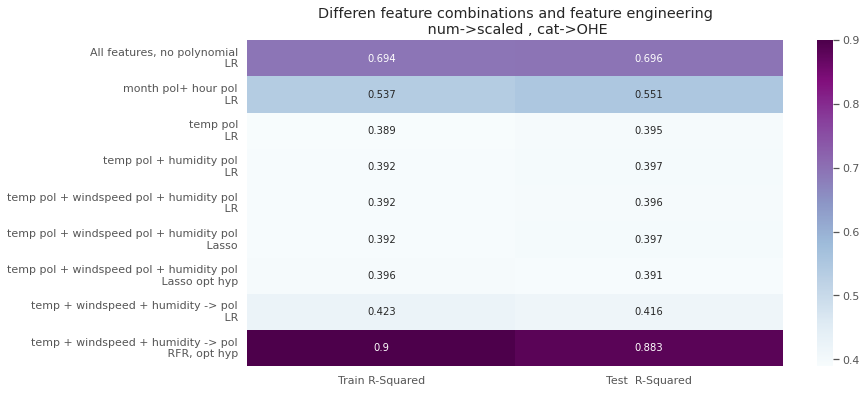

In [249]:
data = [[0.694, 0.696],[0.537, 0.551],[0.389, 0.395],[0.392, 0.397], [0.392, 0.396], [0.392, 0.397], [0.396, 0.391], [0.423, 0.416], [0.900, 0.883]]
plt.rcParams['figure.figsize'] = (12, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Train R-Squared', 'Test  R-Squared'], 
            yticklabels=['All features, no polynomial\n LR', 'month pol+ hour pol\n LR', 
                         'temp pol\n LR', 'temp pol + humidity pol\n LR',
                         'temp pol + windspeed pol + humidity pol\n LR',
                         'temp pol + windspeed pol + humidity pol\n Lasso',
                         'temp pol + windspeed pol + humidity pol\n Lasso opt hyp',
                        'temp + windspeed + humidity -> pol\n LR',
                        'temp + windspeed + humidity -> pol\n RFR, opt hyp'], 
            )
p.set_title("Differen feature combinations and feature engineering\n num->scaled , cat->OHE")